In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams['figure.figsize'] = 14, 6

In [2]:
normalize_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/train", train=True, transform=normalize_transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root="./CIFAR10/test", train=False, transform=normalize_transform, download=True)

In [3]:
batch_size = 128 
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size)
test_loader=torch.utils.data.DataLoader

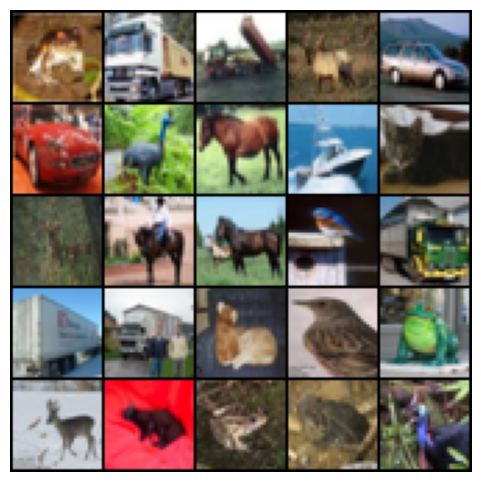

In [4]:
dataiter=iter(train_loader)
images,labels=next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:25],normalize=True,padding=1,nrow=5).numpy(),(1,2,0)))
plt.axis('off')
plt.show()

analyzing dataset classifiaction

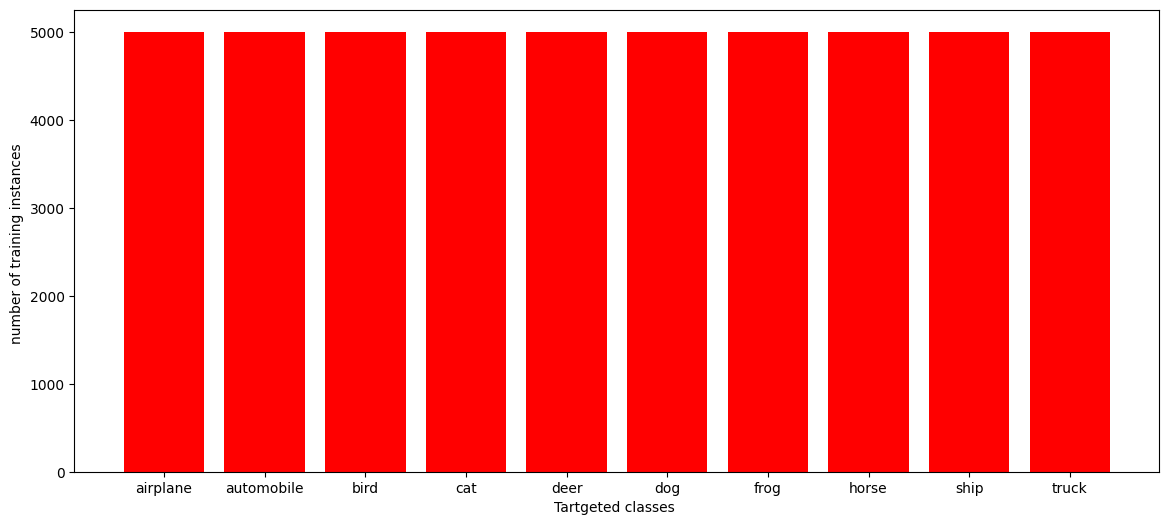

In [15]:
classes=[]
for batch_idx,data in enumerate(train_loader):
       x,y=data
       classes.extend(y.tolist())
unique,counts=np.unique(classes,return_counts=True)
names=list(test_dataset.class_to_idx.keys())
plt.bar(names,counts,color='red')
plt.xlabel("Tartgeted classes ")
plt.ylabel("number of training instances ")
plt.show()

builing the cnn arcitecture

In [20]:
import torch

class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),

            torch.nn.Flatten(),
            torch.nn.Linear(64 * 4 * 4, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.model(x)


In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

num_epochs = 50
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=weight_decay)

step 8

In [22]:
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end=' ')
    train_loss = 0
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss_list.append(train_loss / len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")


Epoch 1/50: Training loss = 1.62987038942859
Epoch 2/50: Training loss = 1.3317240116846225
Epoch 3/50: Training loss = 1.206107991278324
Epoch 4/50: Training loss = 1.1194839299182453
Epoch 5/50: Training loss = 1.0509017931530849
Epoch 6/50: Training loss = 1.0083583003419745
Epoch 7/50: Training loss = 0.976684834341259
Epoch 8/50: Training loss = 0.9506562992434977
Epoch 9/50: Training loss = 0.9312893995238692
Epoch 10/50: Training loss = 0.917229632282501
Epoch 11/50: Training loss = 0.904613635424153
Epoch 12/50: Training loss = 0.8936617636619626
Epoch 13/50: Training loss = 0.8815457319359645
Epoch 14/50: Training loss = 0.8743333208286549
Epoch 15/50: Training loss = 0.8673266698332394
Epoch 16/50: Training loss = 0.8600886098259245
Epoch 17/50: Training loss = 0.8527049006098677
Epoch 18/50: Training loss = 0.8465957669041041
Epoch 19/50: Training loss = 0.8406172835308573
Epoch 20/50: Training loss = 0.836234832053904
Epoch 21/50: Training loss = 0.8328318158378991
Epoch 22